In [1]:
import random
import numpy as np

data = [(i, random.random()*3 + i + 5) for i in range(1, 31)]
data

[(1, 8.341948873628777),
 (2, 7.671572099681072),
 (3, 10.71410585534543),
 (4, 11.28361698088726),
 (5, 11.906150955396832),
 (6, 13.933097116171371),
 (7, 13.813083909851187),
 (8, 15.682061311465102),
 (9, 16.902635238220974),
 (10, 17.913350752943916),
 (11, 17.50040995819893),
 (12, 17.506864752332447),
 (13, 20.03581026522241),
 (14, 19.32120041100304),
 (15, 21.02787750613505),
 (16, 21.60717511716282),
 (17, 22.698227065902916),
 (18, 25.997262003362533),
 (19, 25.44549719219317),
 (20, 27.85879663566369),
 (21, 28.44312184520669),
 (22, 27.415839858554907),
 (23, 30.646634275008235),
 (24, 30.574652018063844),
 (25, 30.875493846862938),
 (26, 33.13028842691173),
 (27, 33.136096646414416),
 (28, 35.83756338200245),
 (29, 36.65759033262524),
 (30, 36.909899536832306)]

Text(0.5, 0, 'X')

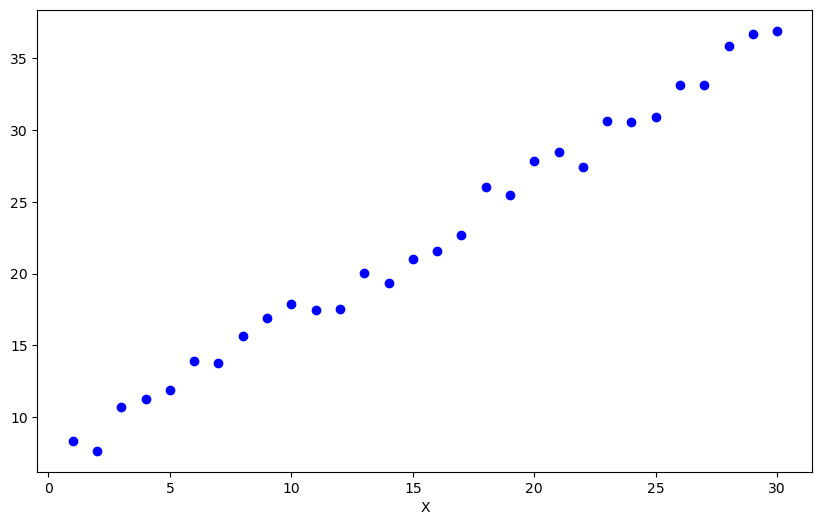

In [2]:
import matplotlib.pyplot as plt
x = [i[0] for i in data]
y = [i[1] for i in data]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='b', label='Data Points')
plt.xlabel('X')

In [3]:
Y = [i[1] for i in data]
X = [(i[0],1) for i in data]
Y = np.array(Y)
X = np.array(X)

In [4]:
def f(a, b, X, Y):
    return np.sum((Y - np.dot(X, [a, b]))**2)

In [5]:
def df(a0, b0):
    point = np.random.randint(1, len(X))
    a, b = a0, b0
    grad_a = 2 * (Y[point] - np.dot(X[point], [a, b])) * (-X[point][0])
    grad_b = 2 * (Y[point] - np.dot(X[point], [a, b])) * (-X[point][1])
    return grad_a, grad_b

In [6]:
res = []
w0 = np.array([0, 0])
lam = 0.0001

while True:
    res.append(w0.copy())
    w1 = w0 - lam * np.array(df(*w0))
    if np.linalg.norm(w1 - w0) <= 0.0001:
        break
    w0 = w1
    
    
def Dynamic(w):
    return w

result = Dynamic(w0)
result

array([1.34738461, 0.13006122])

In [7]:
x_1 = [i[0] for i in data]
import statsmodels.api as sm

x_1 = sm.add_constant(x_1)
model = sm. OLS (y, x_1). fit ()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     2675.
Date:                Thu, 11 Apr 2024   Prob (F-statistic):           2.47e-29
Time:                        20:50:56   Log-Likelihood:                -38.693
No. Observations:                  30   AIC:                             81.39
Df Residuals:                      28   BIC:                             84.19
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9781      0.341     20.485      0.000       6.280       7.676
x1             0.9924      0.019     51.716      0.000       0.953       1.032
==============================================================================
Omnibus:                        7.871   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                2.609
Skew:                          -0.339   Prob(JB):                        0.271
Kurtosis:                       1.724   Cond. No.                         36.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
coef = np.array([0.9924,6.6929])

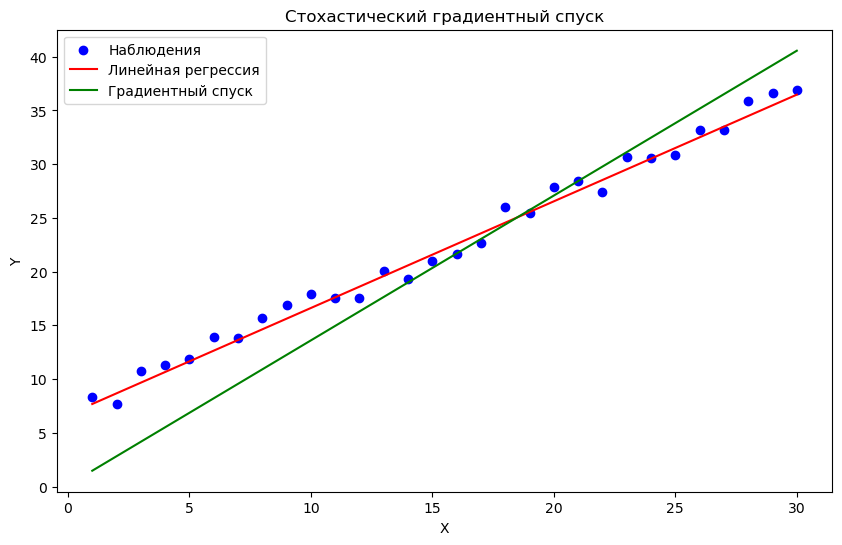

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='b', label='Наблюдения')
plt.plot(X[:, 0], X.dot(coef),color='red',label='Линейная регрессия')
plt.plot(X[:, 0], X.dot(result), color='green', label='Градиентный спуск')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Стохастический градиентный спуск')
plt.legend()
plt.show()